In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('talk')
import sys
from helpers import *

In [2]:
all_data, combined_data = get_fmri_data()

# FGES with default s=8, 4 subsamples with 3 subsamplings

In [3]:
num_samples = 494
num_samplings = 3

avg_adj_mats = []
fges_results_nested = []
for i in range(1, 17):
    subject_data = combined_data[f's{i:02d}']
    avg_adj_mat, fges_results = fges_avg_adj_mat_and_results(subject_data, num_samples, num_samplings)
    avg_adj_mats.append(avg_adj_mat)
    fges_results_nested.append(fges_results)

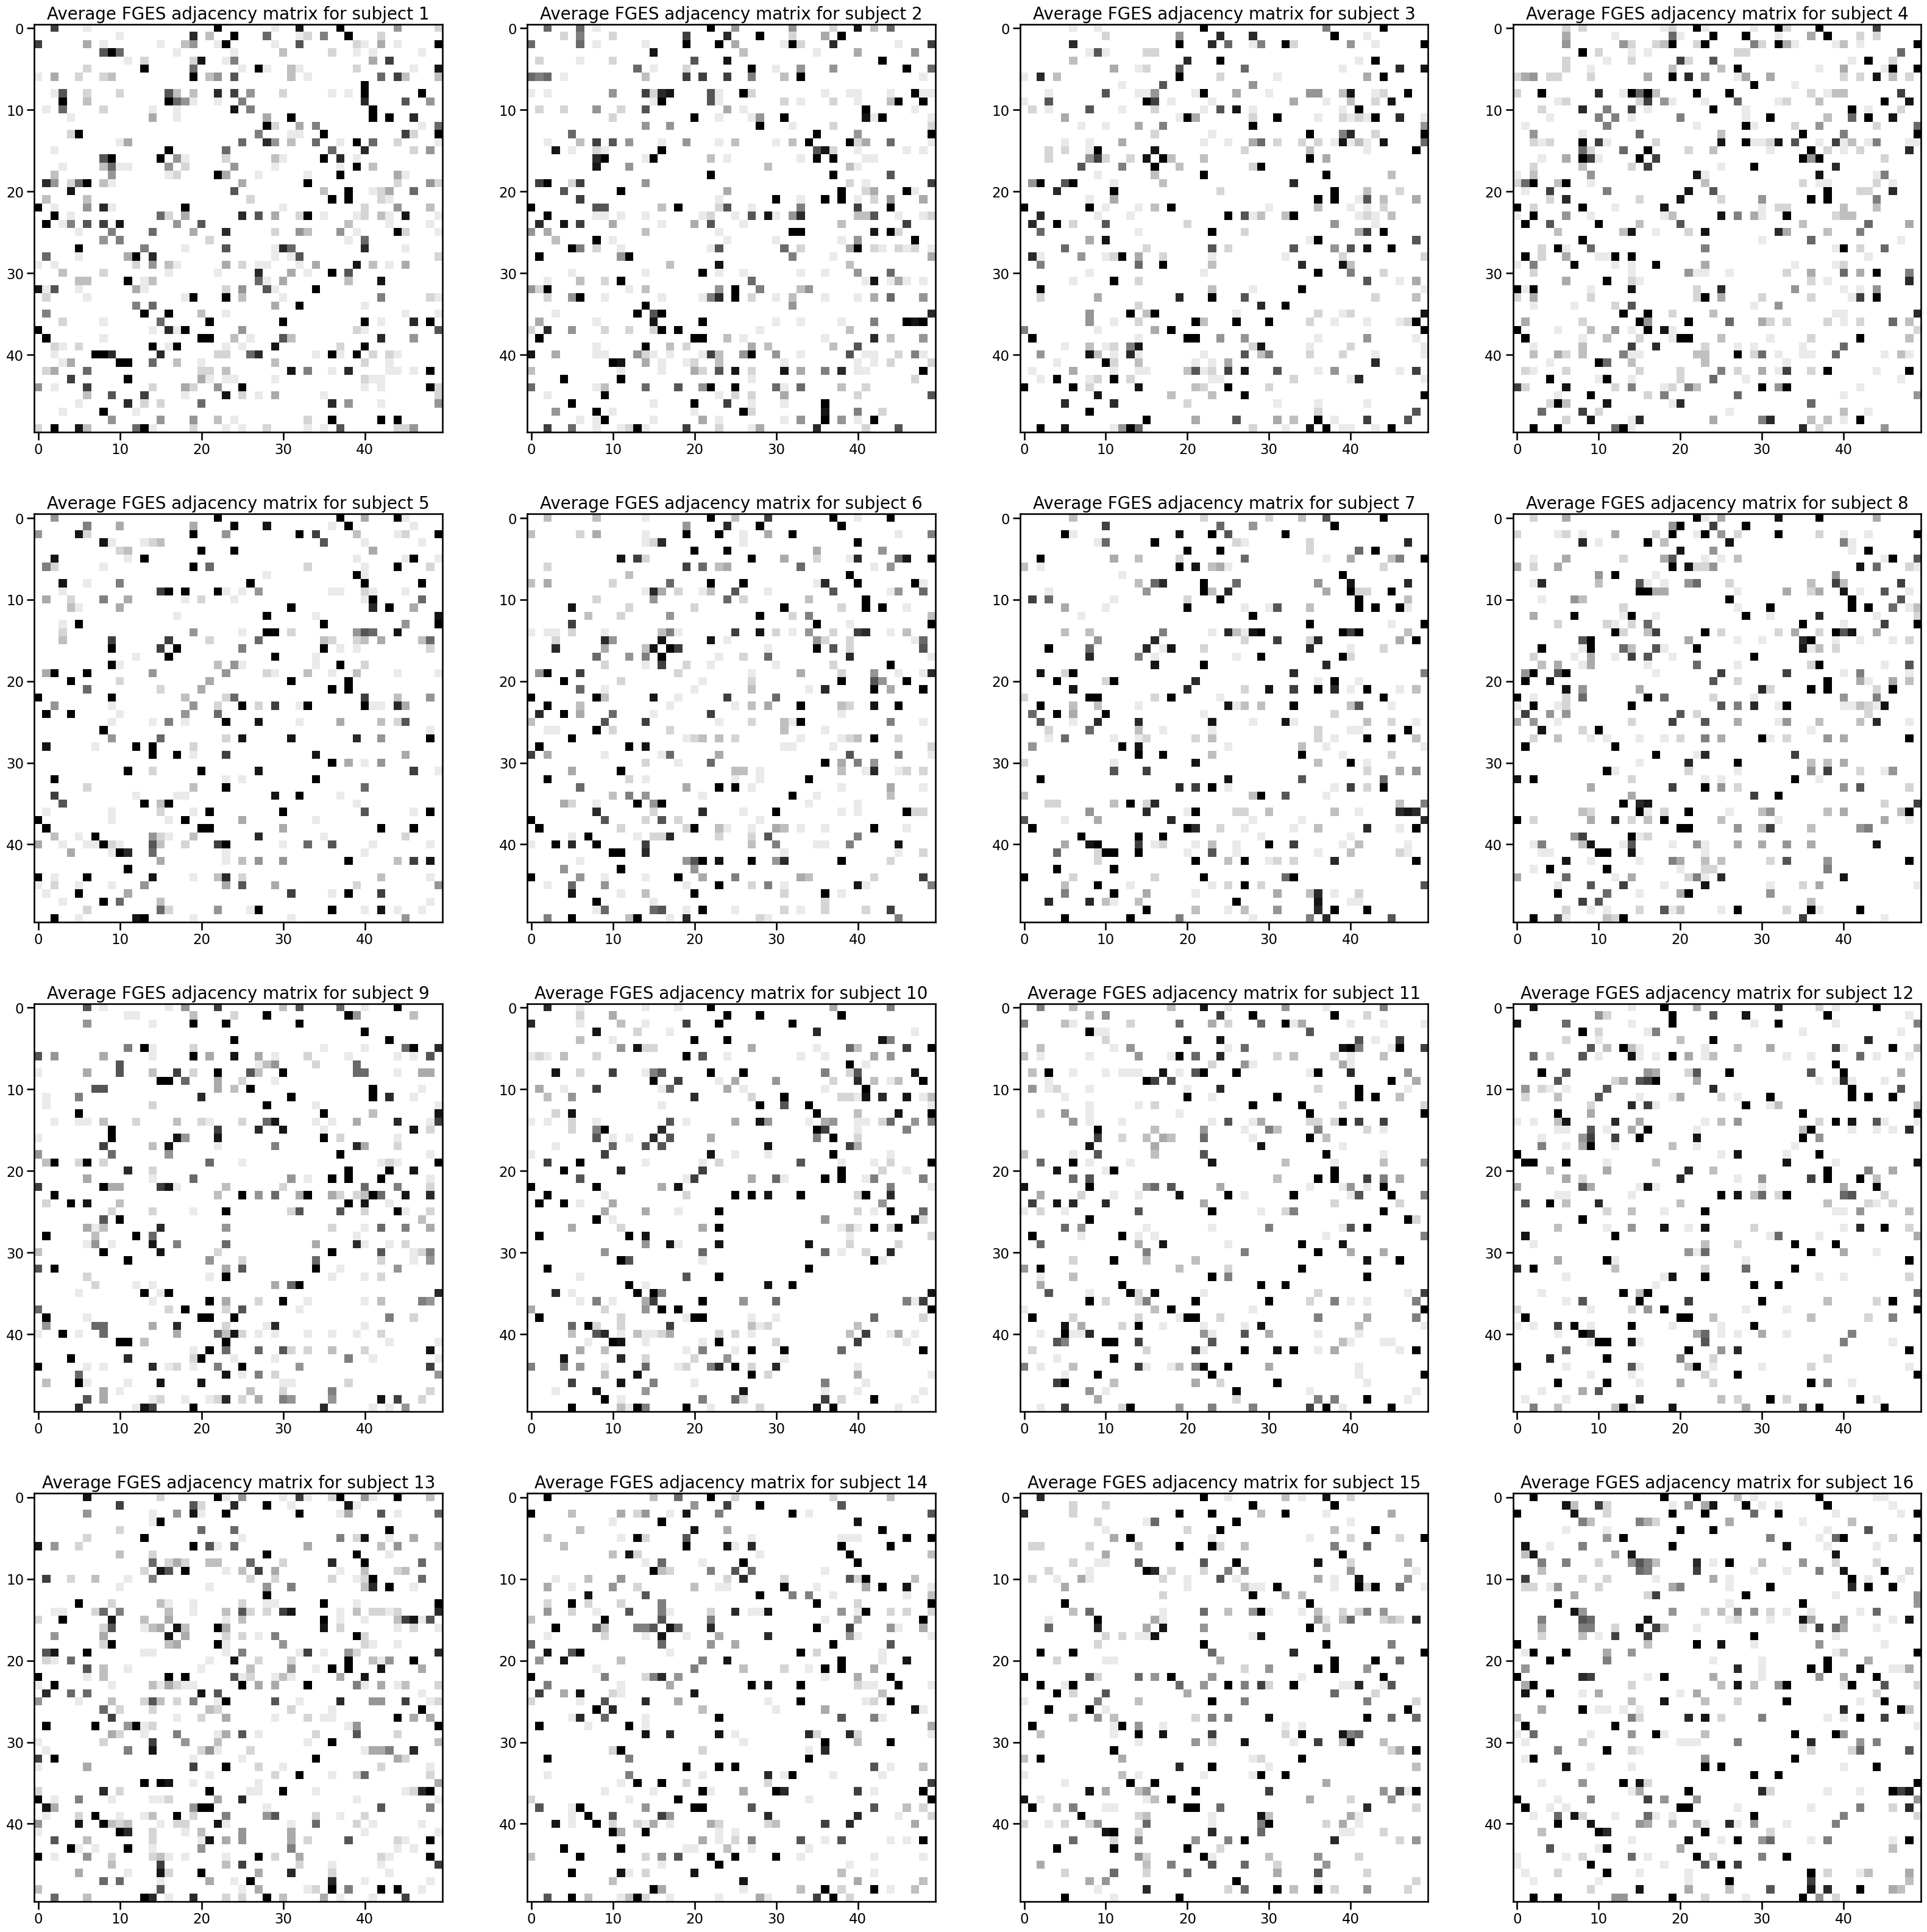

In [4]:
fig, axs = plt.subplots(4, 4, figsize=(40,40))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(avg_adj_mats[i], cmap='binary', interpolation='nearest')
    ax.set_title(f'Average FGES adjacency matrix for subject {i+1}', fontsize=20)

> note: avg adjacency matrix for FGES is less dense with lower num_samples, more dense with higher num_samples

> Subsampling is random so results may vary across runs

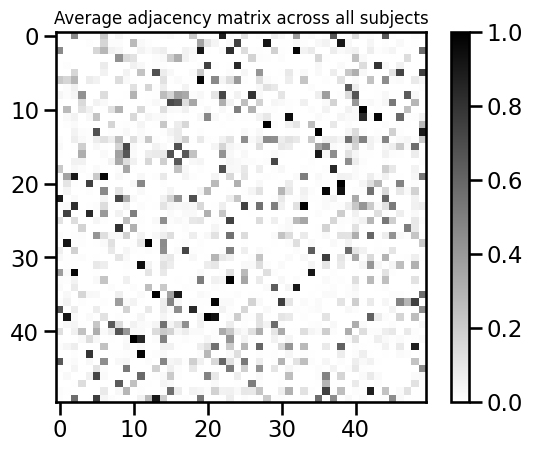

In [5]:
results_avg = np.mean(avg_adj_mats, axis=0)
plt.imshow(results_avg, cmap='binary', interpolation='nearest')
_ = plt.colorbar()
_ = plt.title('Average adjacency matrix across all subjects', fontsize=12)

> Filtering edges based on frequency across all subjects

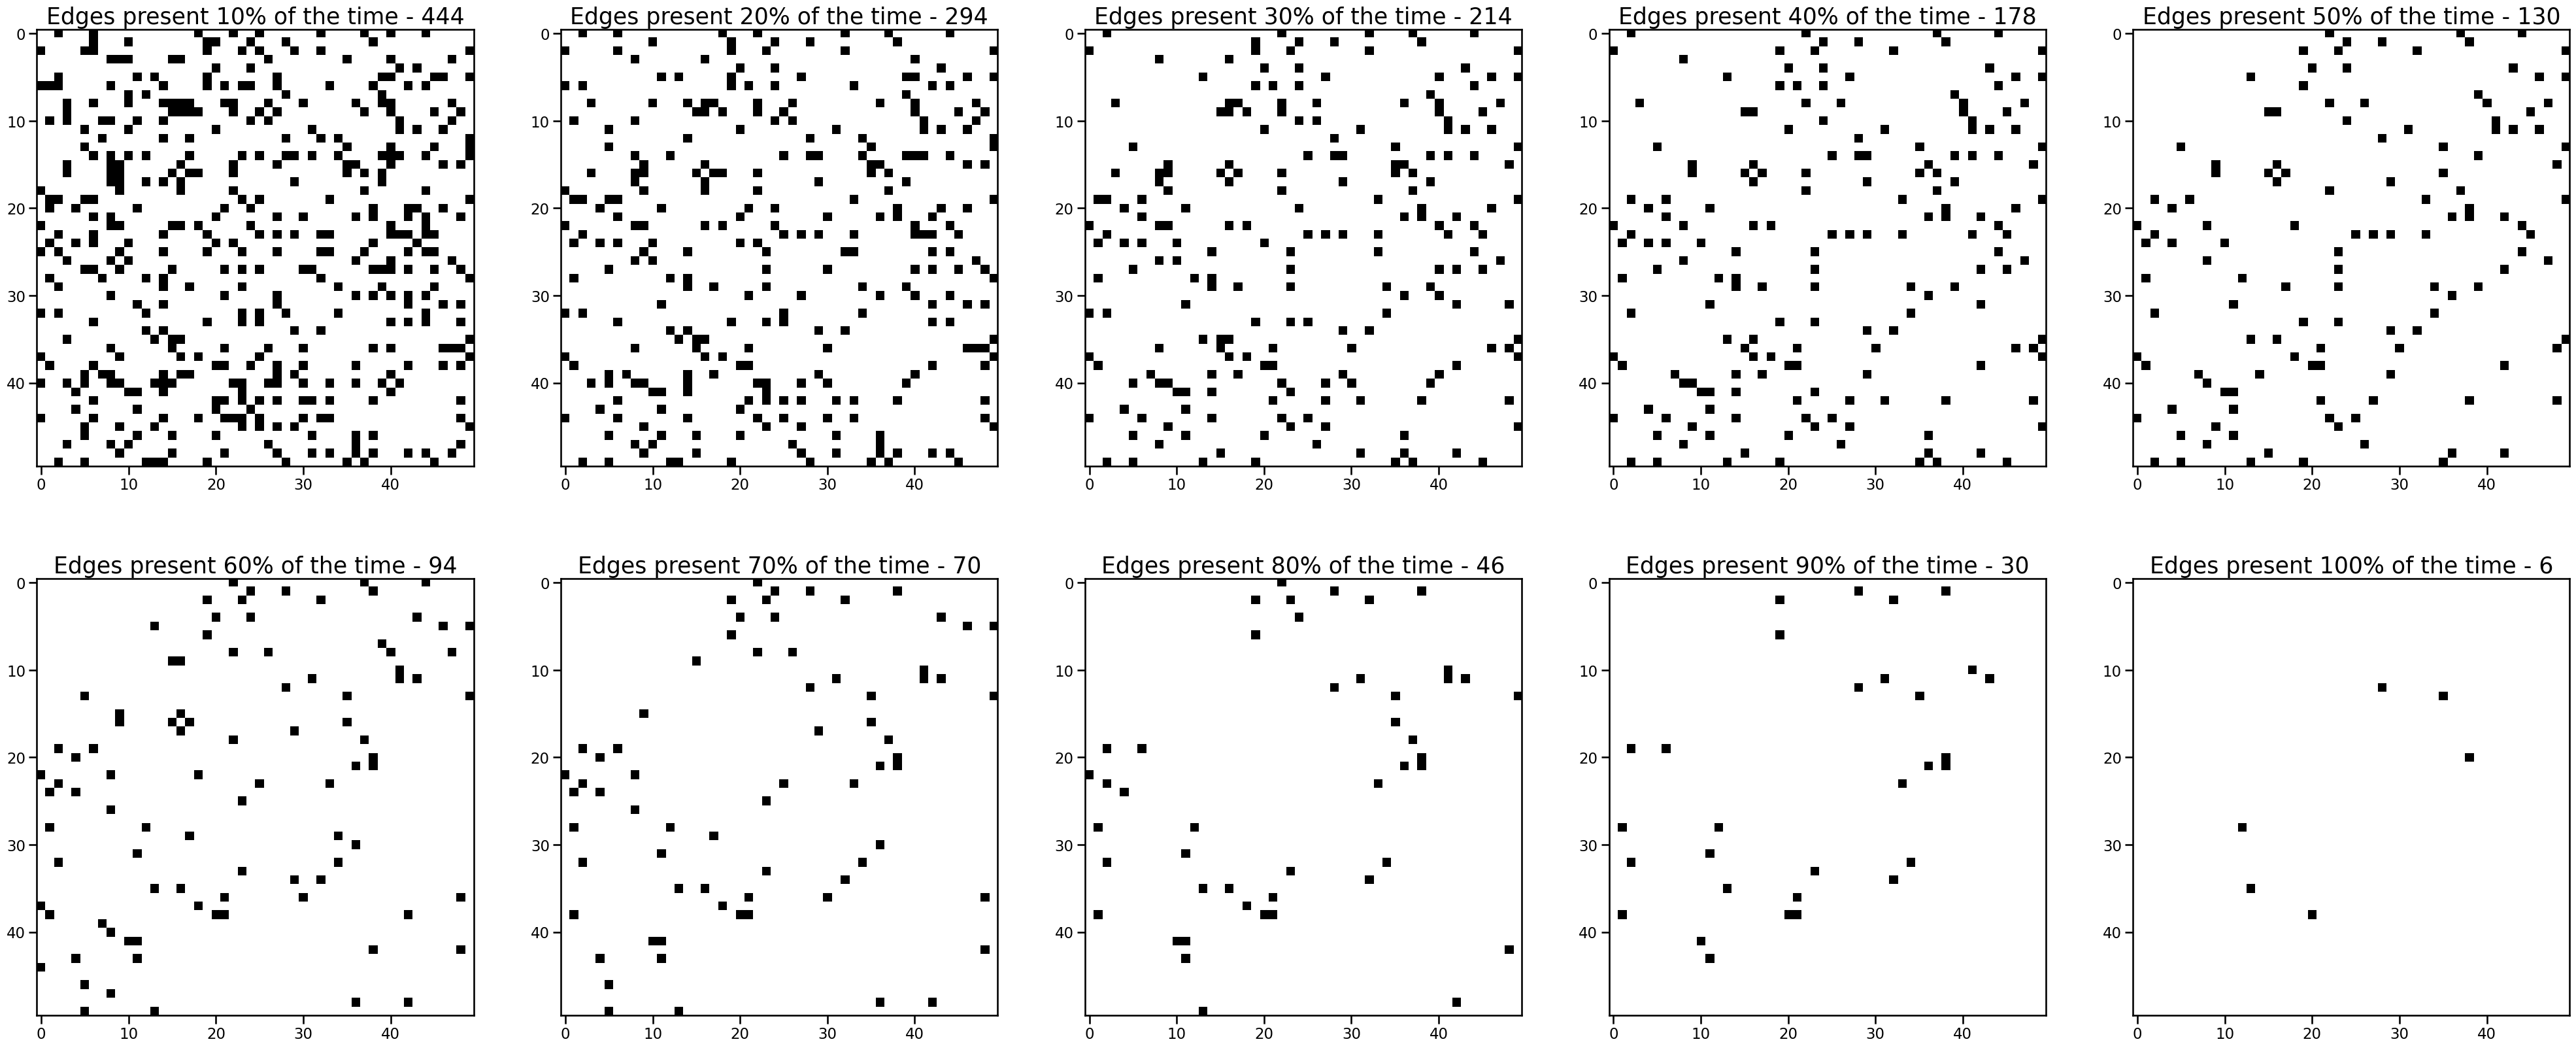

In [6]:
filtered_by_percent_edges = []

fig, axs = plt.subplots(2, 5, figsize=(50,20))
flat_axs = axs.flatten()

for i in range(1,11):
    filter_percent = i/10
    filtered_edges = np.where(results_avg >= filter_percent, 1, 0)

    num_adj_edges = np.sum(filtered_edges)

    ax = flat_axs[i-1]
    ax.imshow(filtered_edges, cmap='binary', interpolation='nearest')
    ax.set_title(f'Edges present {i*10}% of the time - {num_adj_edges}', fontsize=25)

In [7]:
total_deviation = mean_abs_deviations(avg_adj_mats)[1]
print(total_deviation)

2379.0833333333335


# Plotting deviations vs sparsity param

In [8]:
s_params = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
avg_adj_mats_per_s = []
mad_mats = []
deviations = []

for s in s_params:
    avg_adj_mats = []
    for i in range(1, 17):
        subject_data = combined_data[f's{i:02d}']
        avg_adj_mat, _ = fges_avg_adj_mat_and_results(subject_data, num_samples, num_samplings, s=s)
        avg_adj_mats.append(avg_adj_mat)

    avg_adj_mats_per_s.append(avg_adj_mats)
    mad = mean_abs_deviations(avg_adj_mats)
    mad_mats.append(mad[0])
    deviations.append(mad[1])

In [9]:
print(deviations)

[3613.8125, 3174.791666666667, 2808.5, 2572.5, 2383.229166666667, 2207.625, 2097.145833333333, 1986.375, 1908.8958333333335, 1846.1458333333333, 1763.2708333333335]


> Makes sense that deviation decreases with increased sparsity parameter, less edges overall so less differences

# Sparsity parameter 4

Average adjacency matrices with sparsity parameter = 4


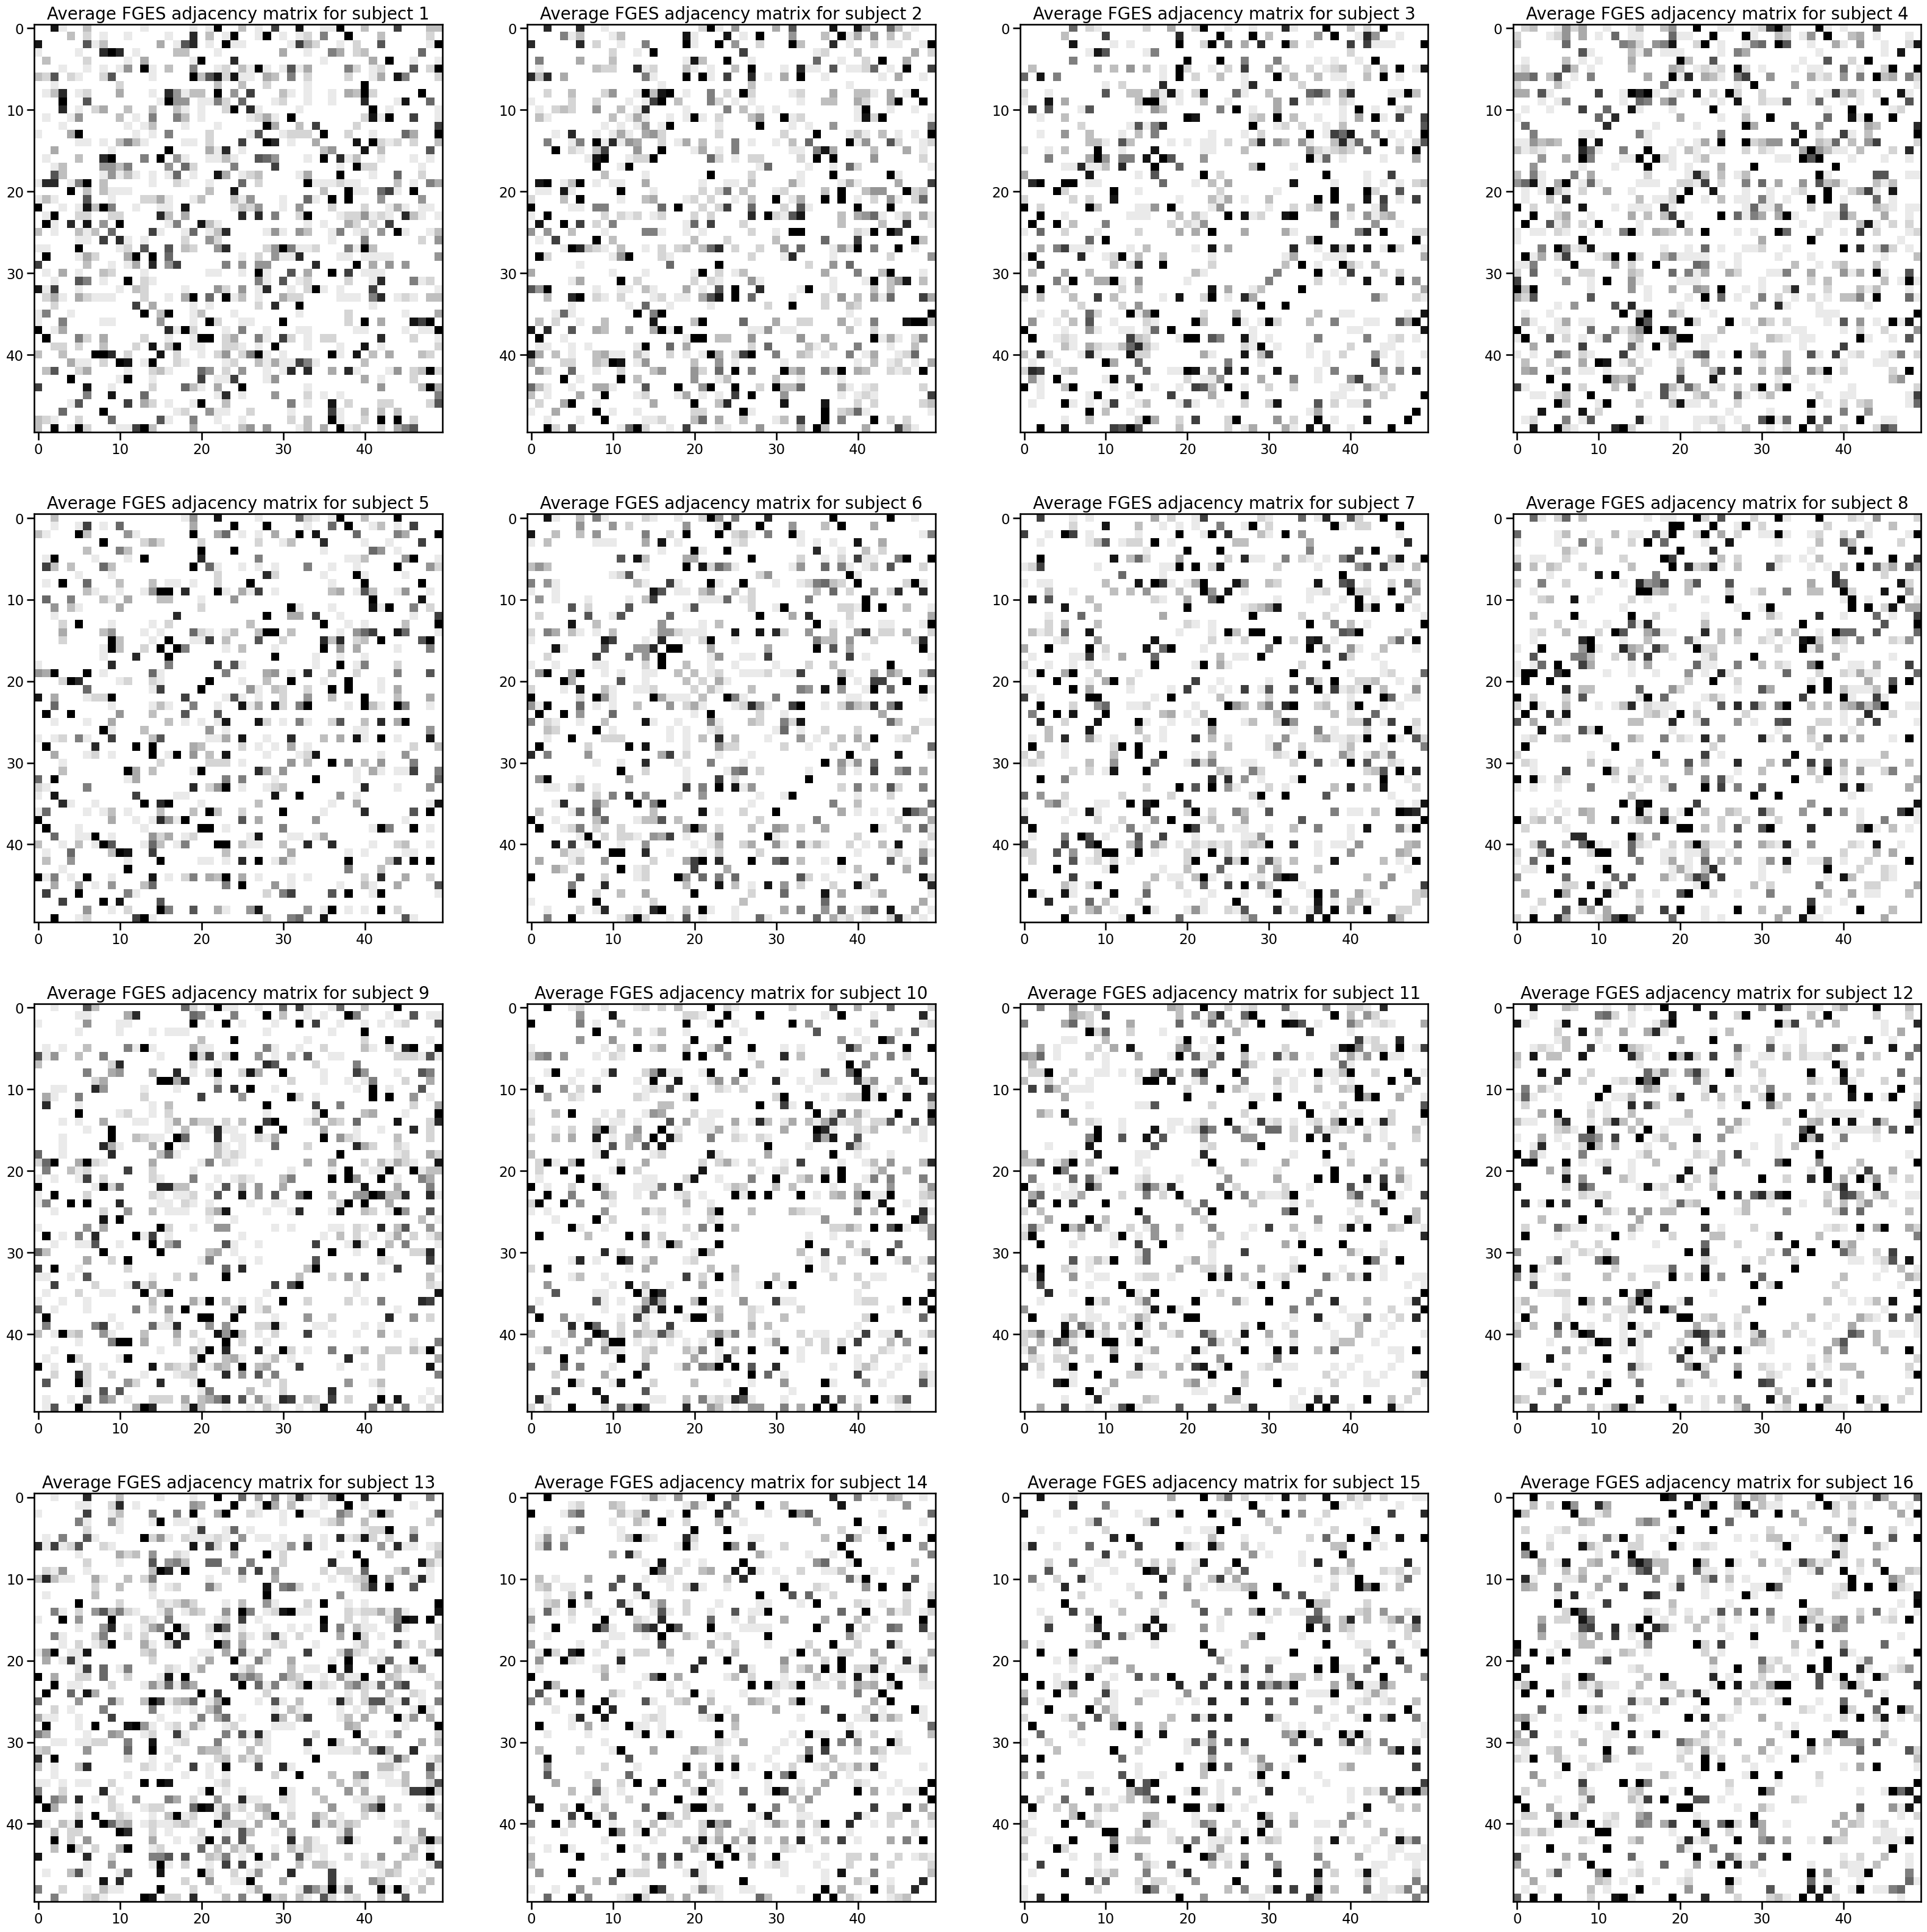

In [10]:
fig, axs = plt.subplots(4, 4, figsize=(40,40))

print('Average adjacency matrices with sparsity parameter = 4')
avg_adj_mats_s4 = avg_adj_mats_per_s[0]

for i, ax in enumerate(axs.flatten()):
    ax.imshow(avg_adj_mats_s4[i], cmap='binary', interpolation='nearest')
    ax.set_title(f'Average FGES adjacency matrix for subject {i+1}', fontsize=20)

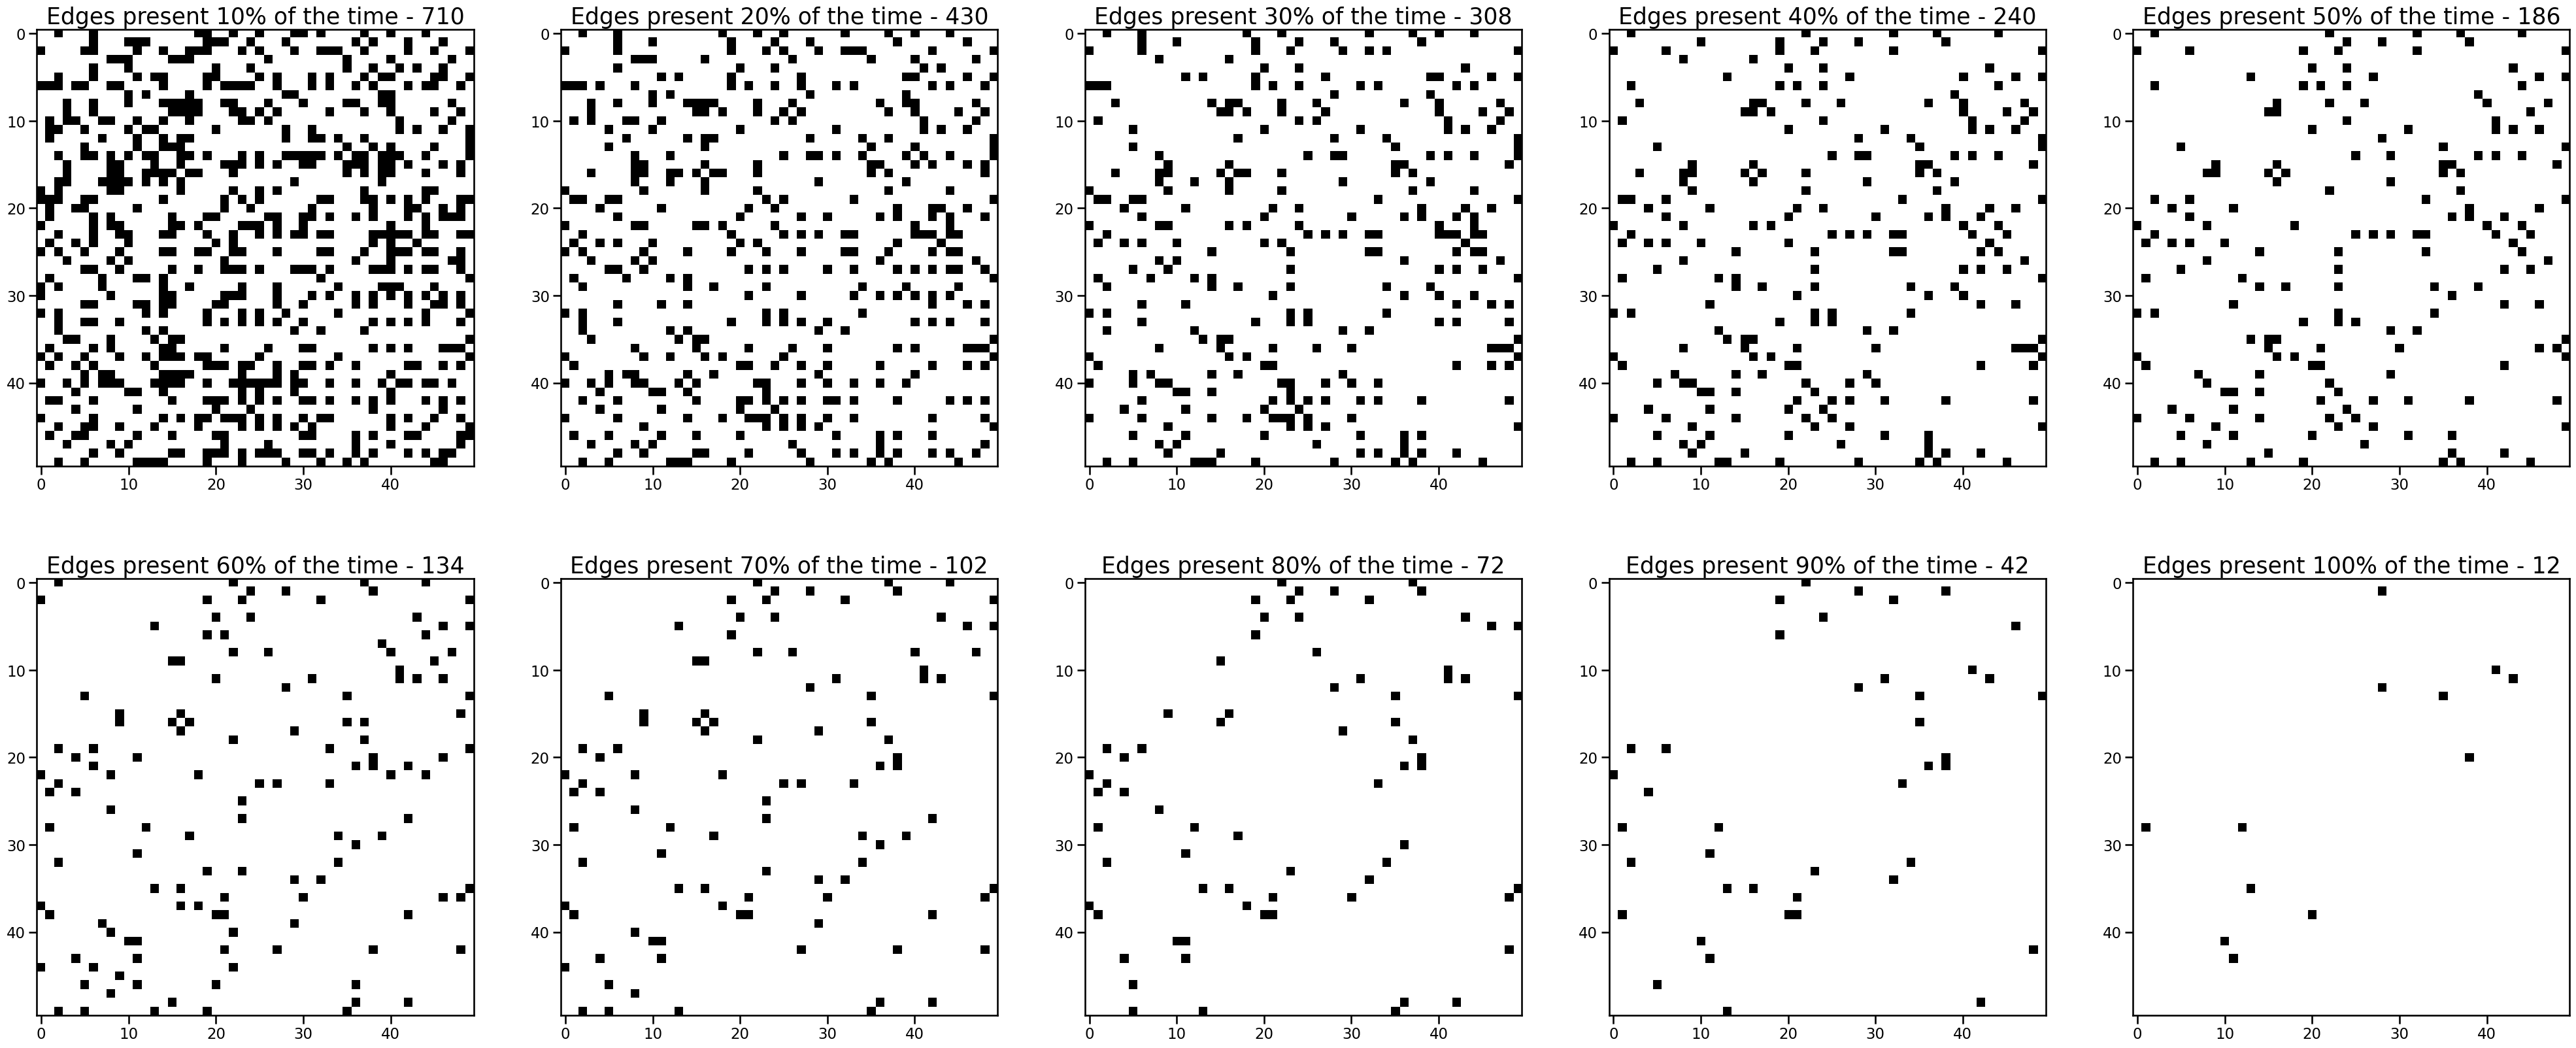

In [11]:
filtered_by_percent_edges = []

fig, axs = plt.subplots(2, 5, figsize=(50,20))
flat_axs = axs.flatten()

results_avg = np.mean(avg_adj_mats_s4, axis=0)

for i in range(1,11):
    filter_percent = i/10
    filtered_edges = np.where(results_avg >= filter_percent, 1, 0)

    num_adj_edges = np.sum(filtered_edges)

    ax = flat_axs[i-1]
    ax.imshow(filtered_edges, cmap='binary', interpolation='nearest')
    ax.set_title(f'Edges present {i*10}% of the time - {num_adj_edges}', fontsize=25)

# Sparsity parameter 8 - comparison and verification

Average adjacency matrices with sparsity parameter = 8


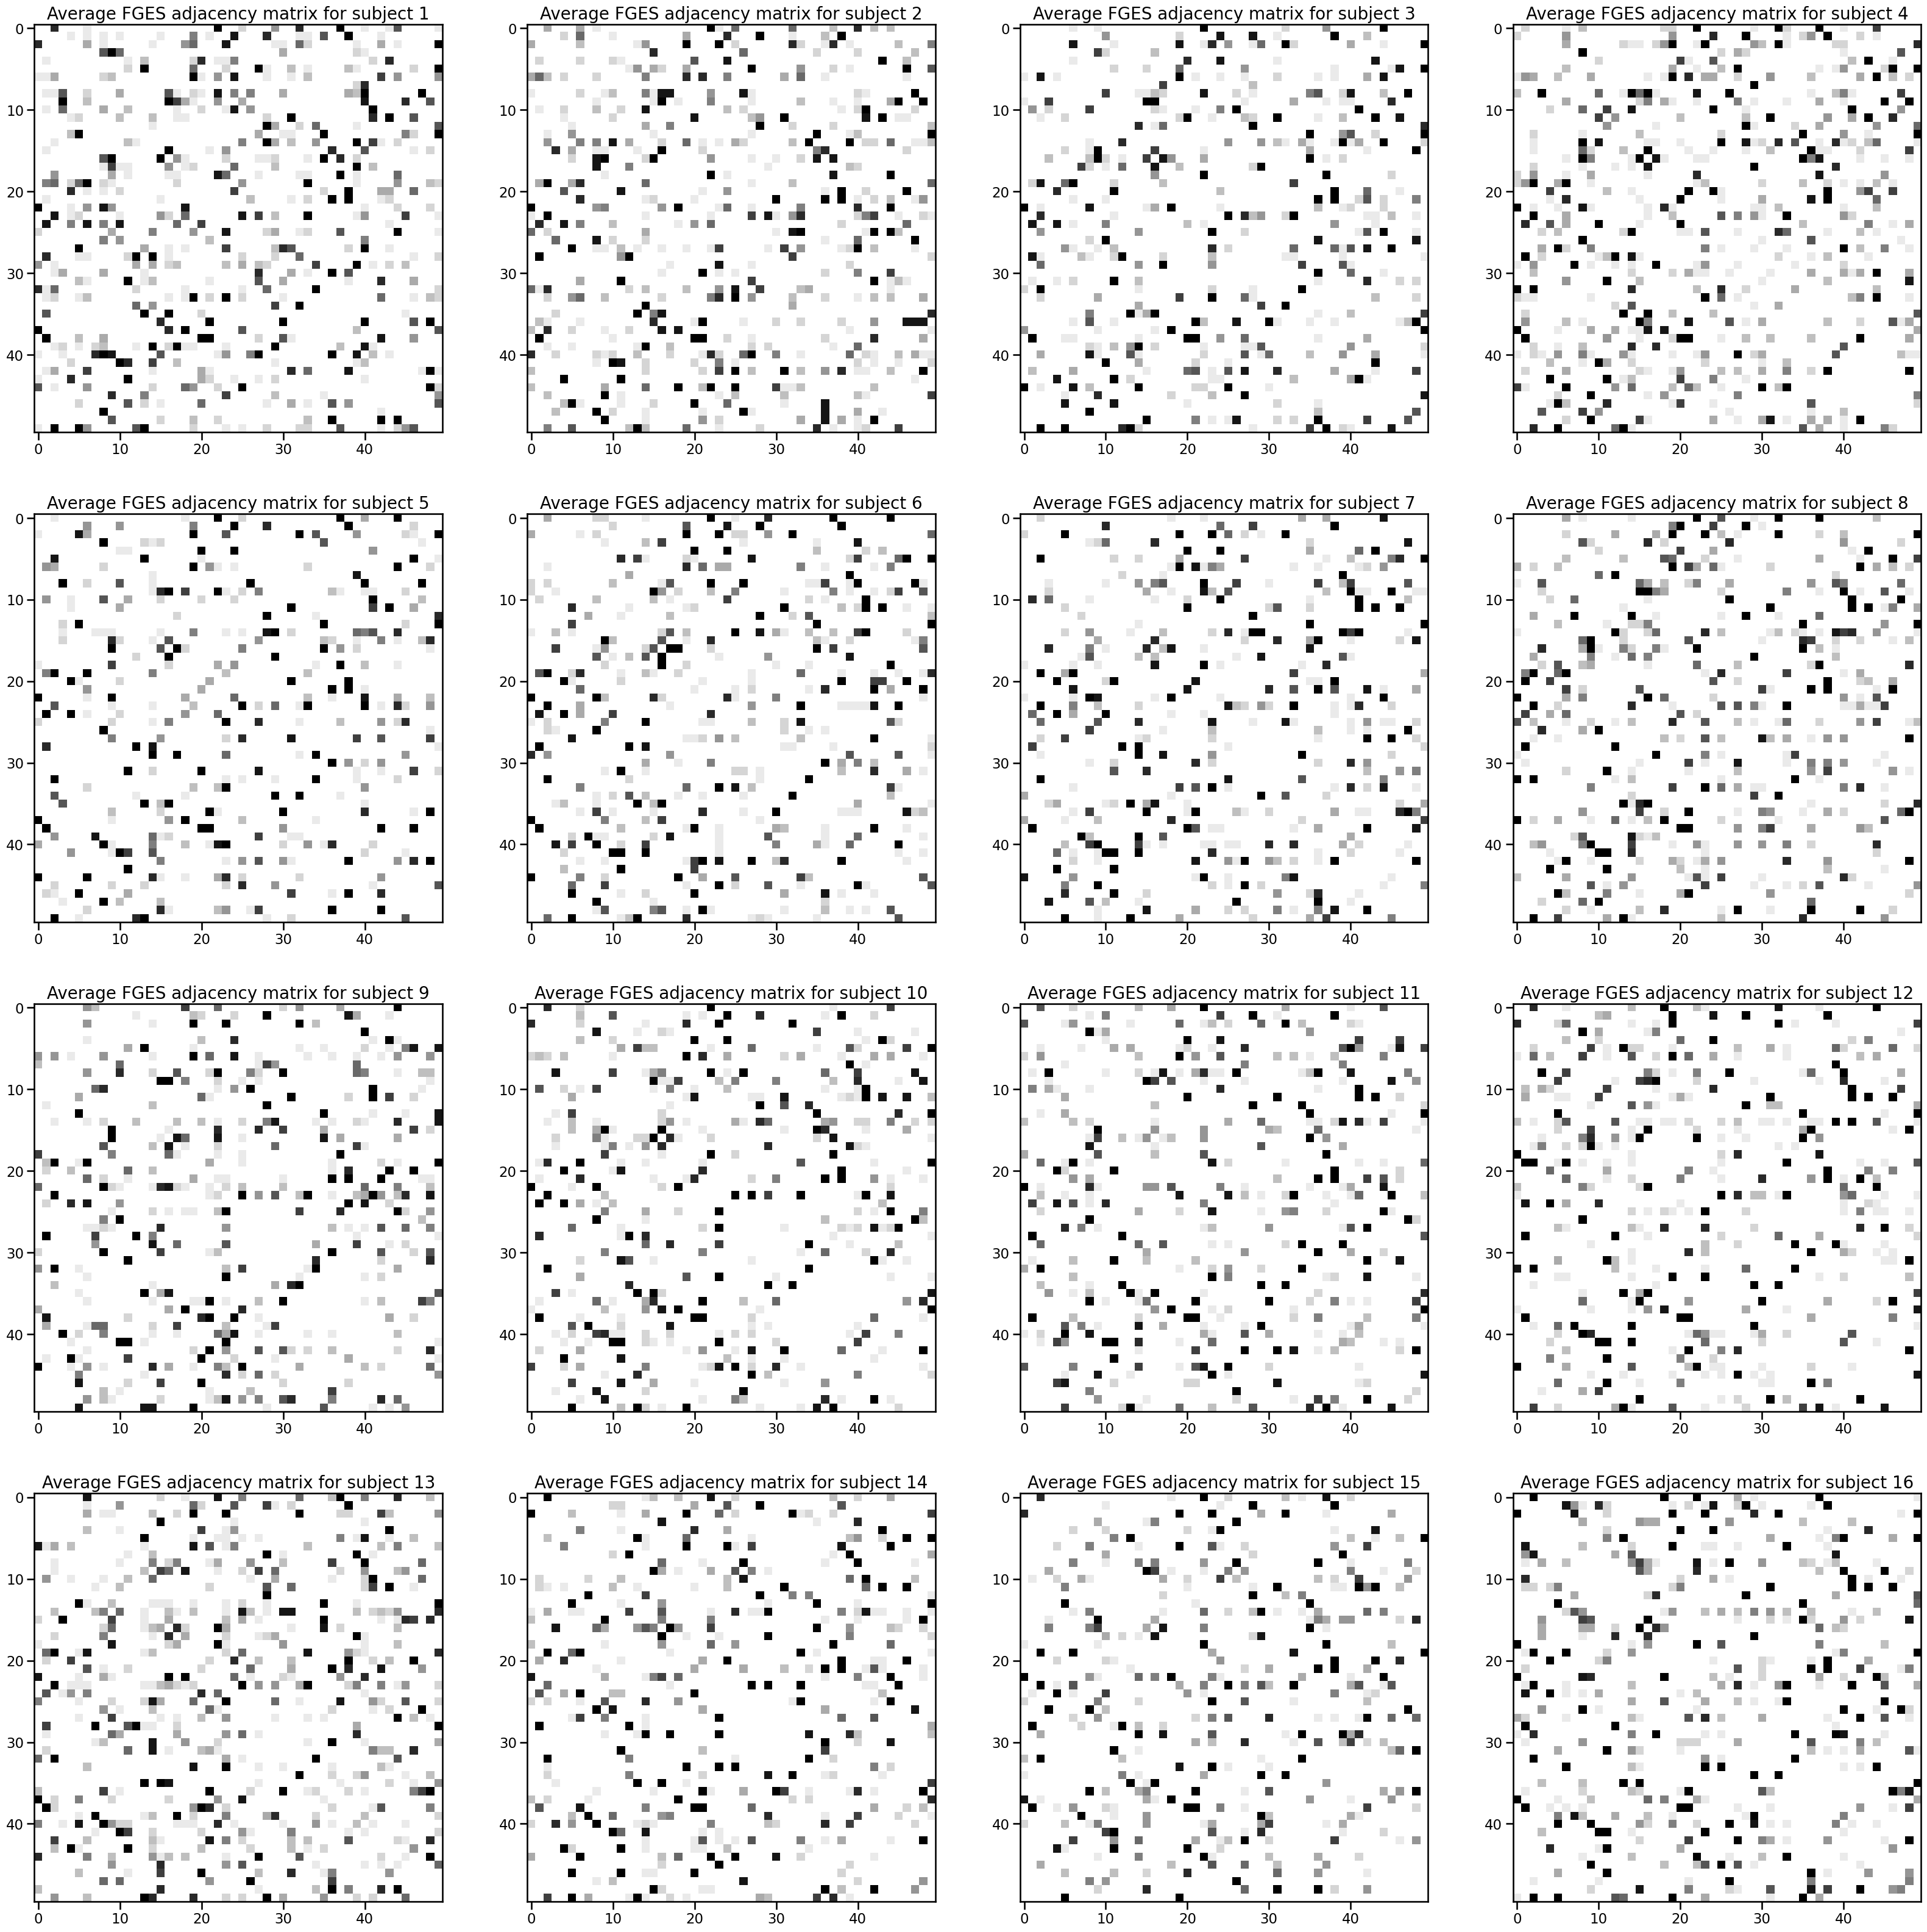

In [12]:
fig, axs = plt.subplots(4, 4, figsize=(40,40))

print('Average adjacency matrices with sparsity parameter = 8')
avg_adj_mats_s8 = avg_adj_mats_per_s[4]

for i, ax in enumerate(axs.flatten()):
    ax.imshow(avg_adj_mats_s8[i], cmap='binary', interpolation='nearest')
    ax.set_title(f'Average FGES adjacency matrix for subject {i+1}', fontsize=20)

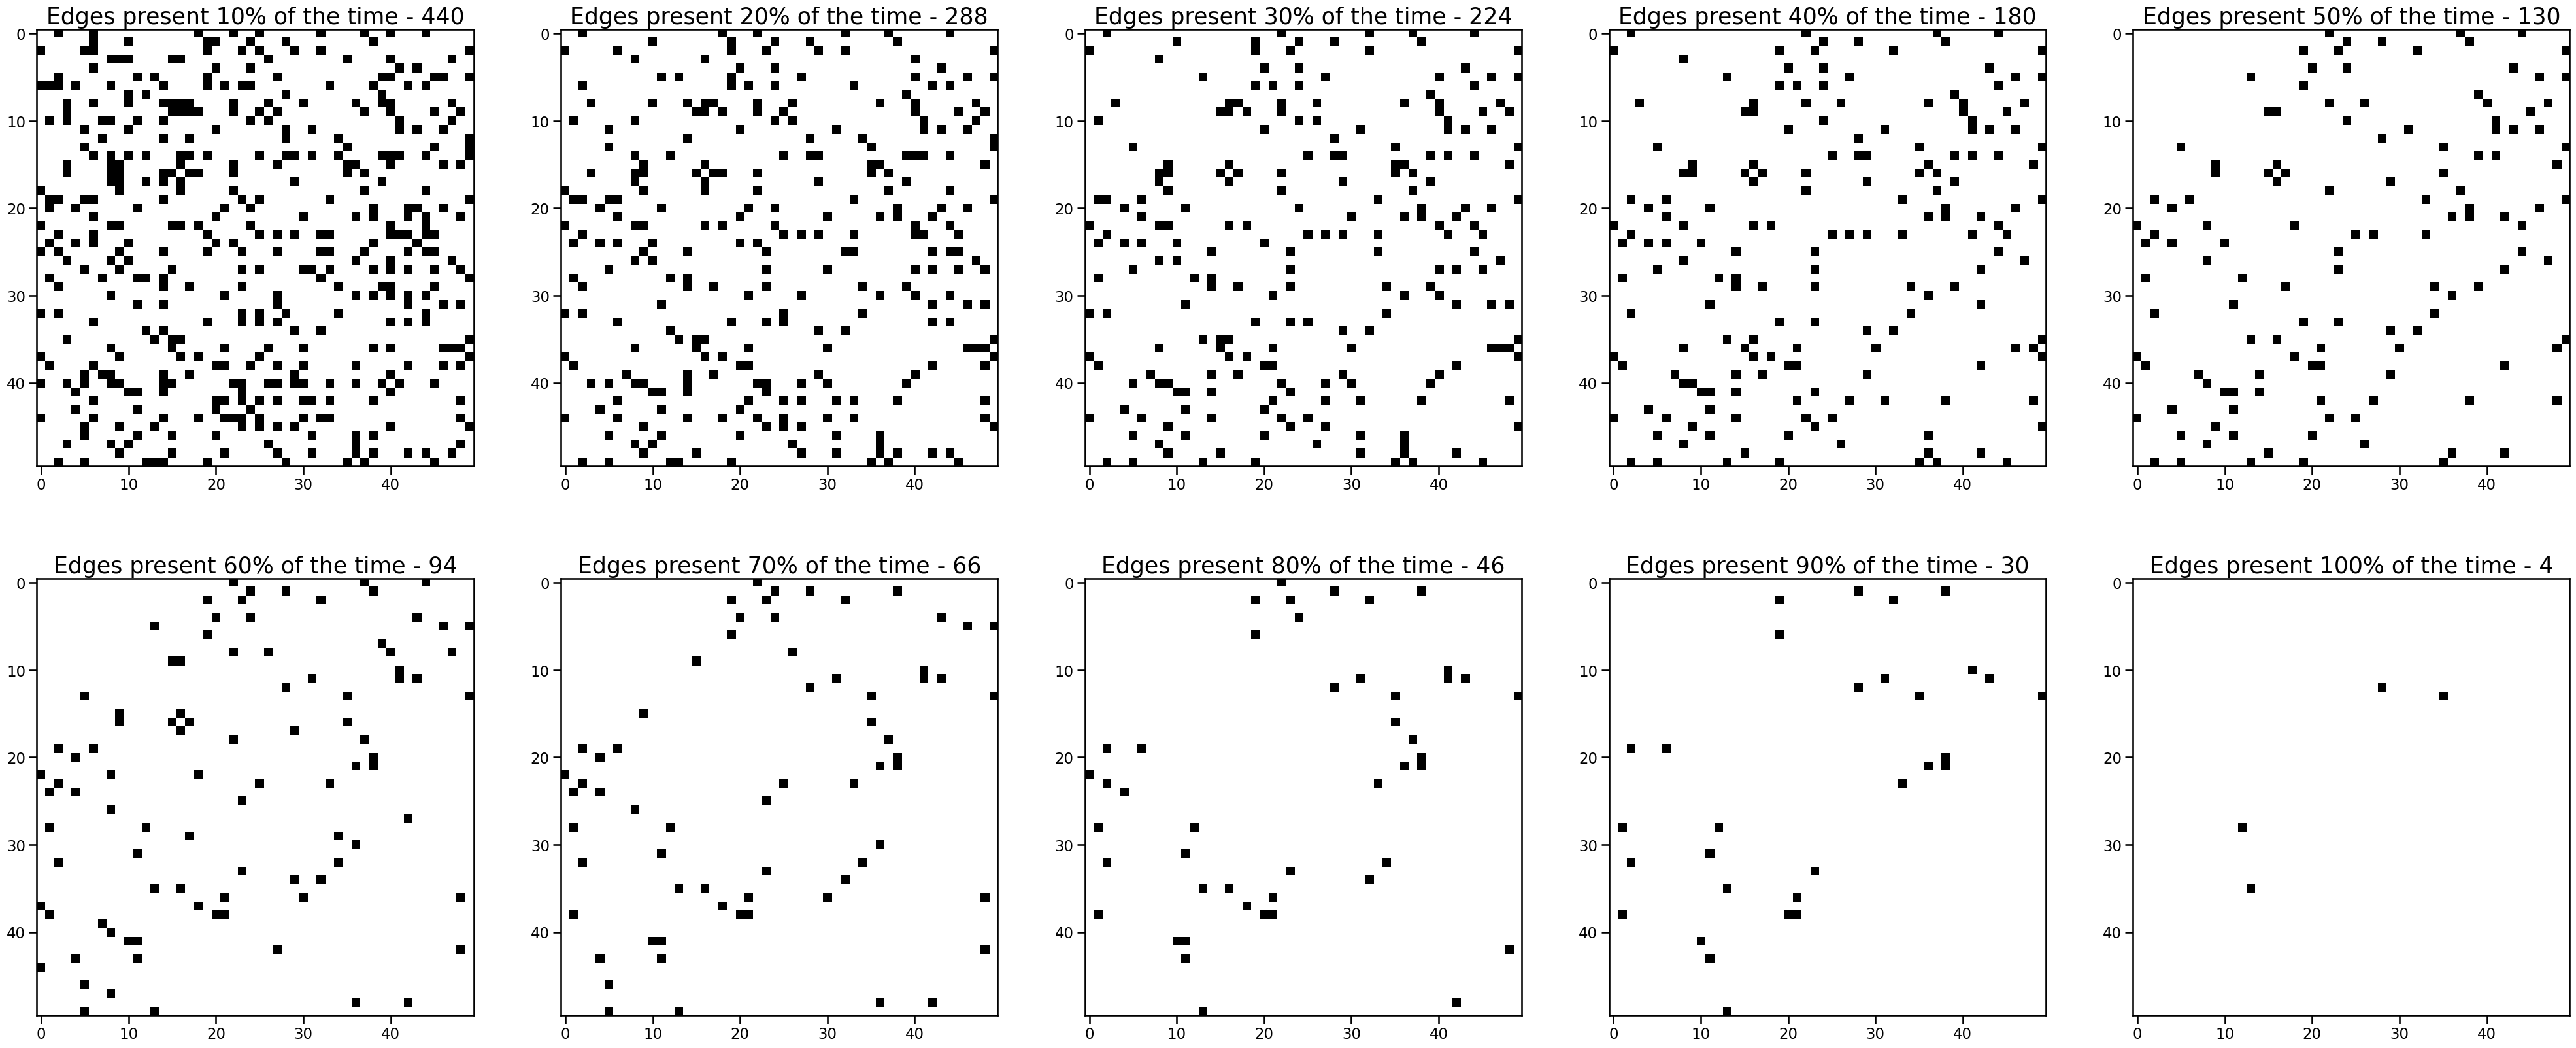

In [13]:
filtered_by_percent_edges = []

fig, axs = plt.subplots(2, 5, figsize=(50,20))
flat_axs = axs.flatten()

results_avg = np.mean(avg_adj_mats_s8, axis=0)

for i in range(1,11):
    filter_percent = i/10
    filtered_edges = np.where(results_avg >= filter_percent, 1, 0)

    num_adj_edges = np.sum(filtered_edges)

    ax = flat_axs[i-1]
    ax.imshow(filtered_edges, cmap='binary', interpolation='nearest')
    ax.set_title(f'Edges present {i*10}% of the time - {num_adj_edges}', fontsize=25)

# Sparsity parameter 14

Average adjacency matrices with sparsity parameter = 14


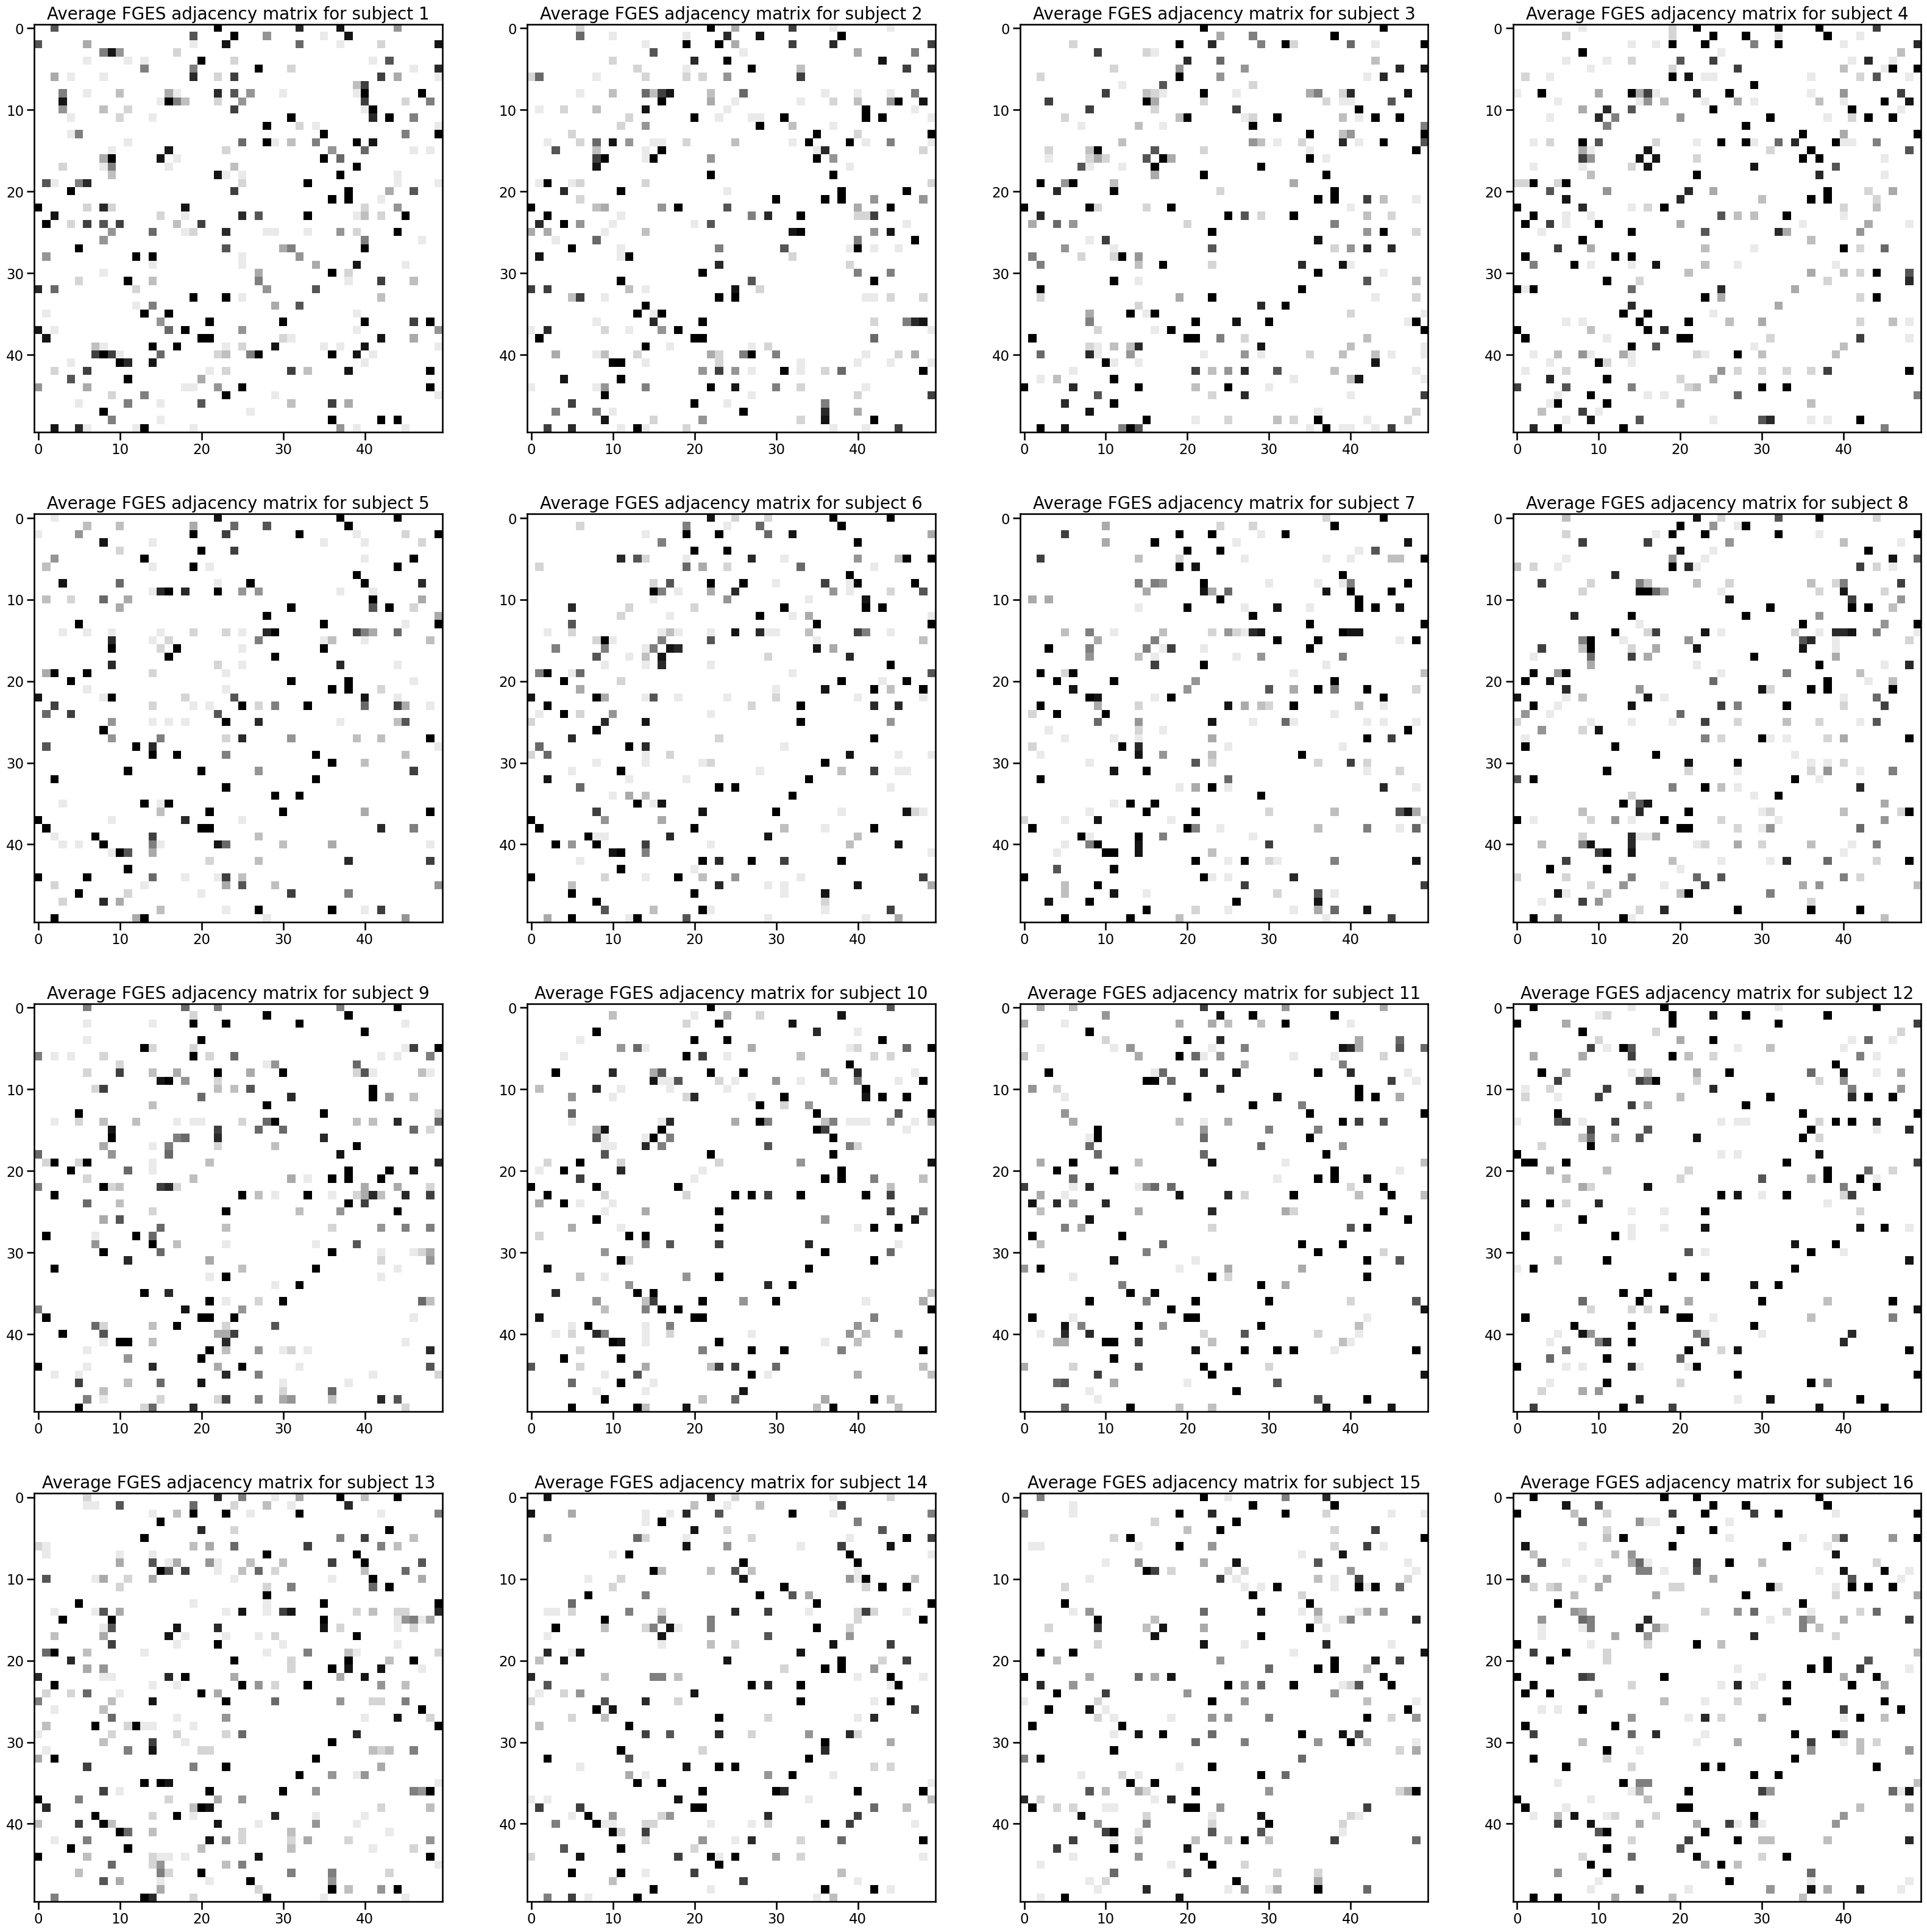

In [14]:
fig, axs = plt.subplots(4, 4, figsize=(40,40))

print('Average adjacency matrices with sparsity parameter = 14')
avg_adj_mats_s14 = avg_adj_mats_per_s[-1]

for i, ax in enumerate(axs.flatten()):
    ax.imshow(avg_adj_mats_s14[i], cmap='binary', interpolation='nearest')
    ax.set_title(f'Average FGES adjacency matrix for subject {i+1}', fontsize=20)

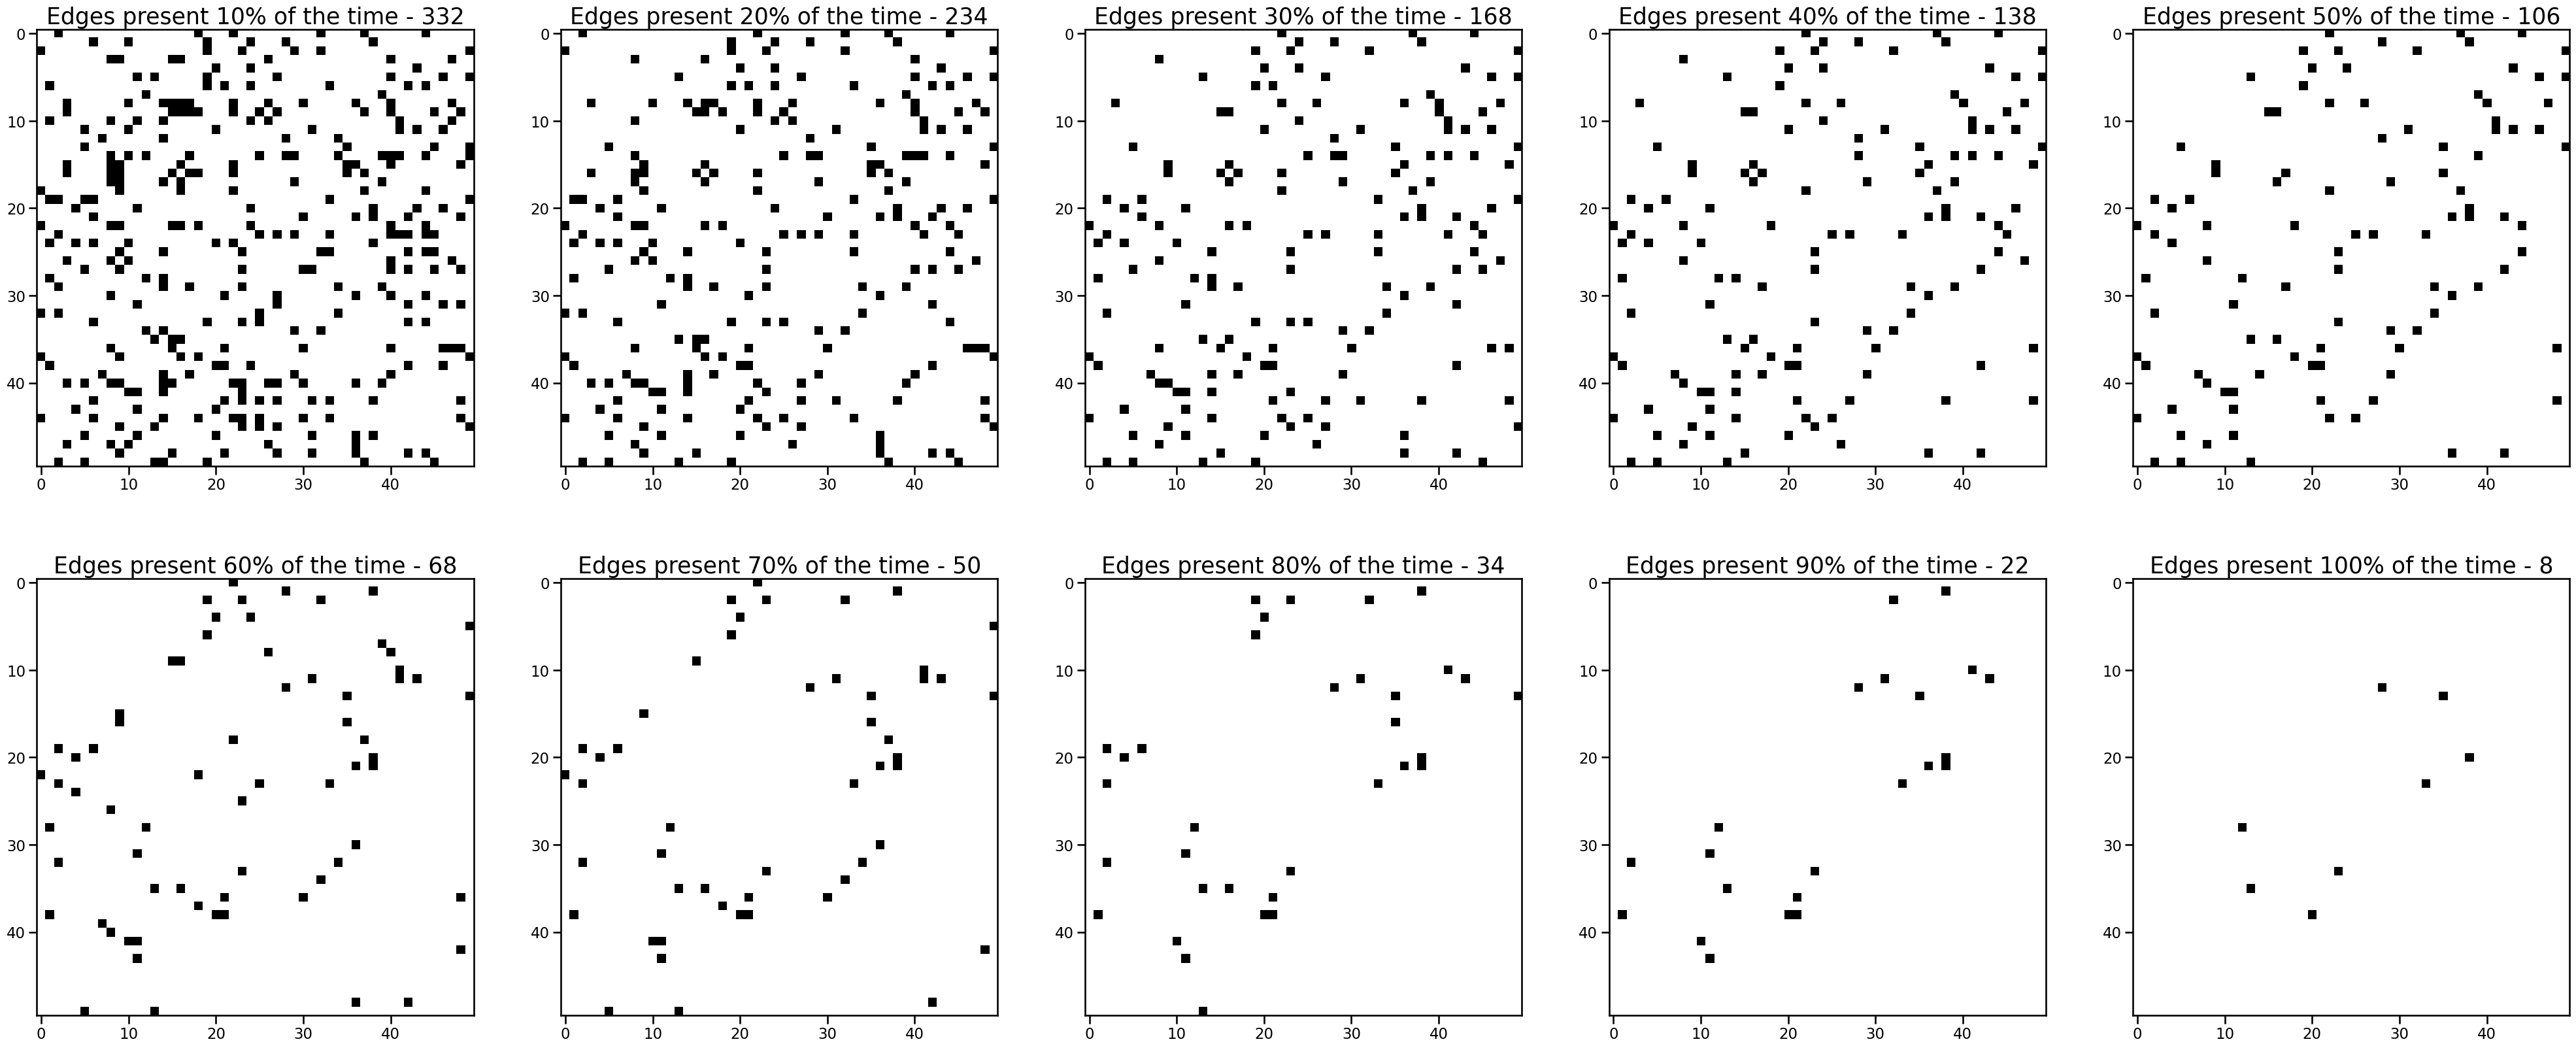

In [15]:
filtered_by_percent_edges = []

fig, axs = plt.subplots(2, 5, figsize=(50,20))
flat_axs = axs.flatten()

results_avg = np.mean(avg_adj_mats_s14, axis=0)

for i in range(1,11):
    filter_percent = i/10
    filtered_edges = np.where(results_avg >= filter_percent, 1, 0)

    num_adj_edges = np.sum(filtered_edges)

    ax = flat_axs[i-1]
    ax.imshow(filtered_edges, cmap='binary', interpolation='nearest')
    ax.set_title(f'Edges present {i*10}% of the time - {num_adj_edges}', fontsize=25)

> want to just show 100% present edges for each sparsity

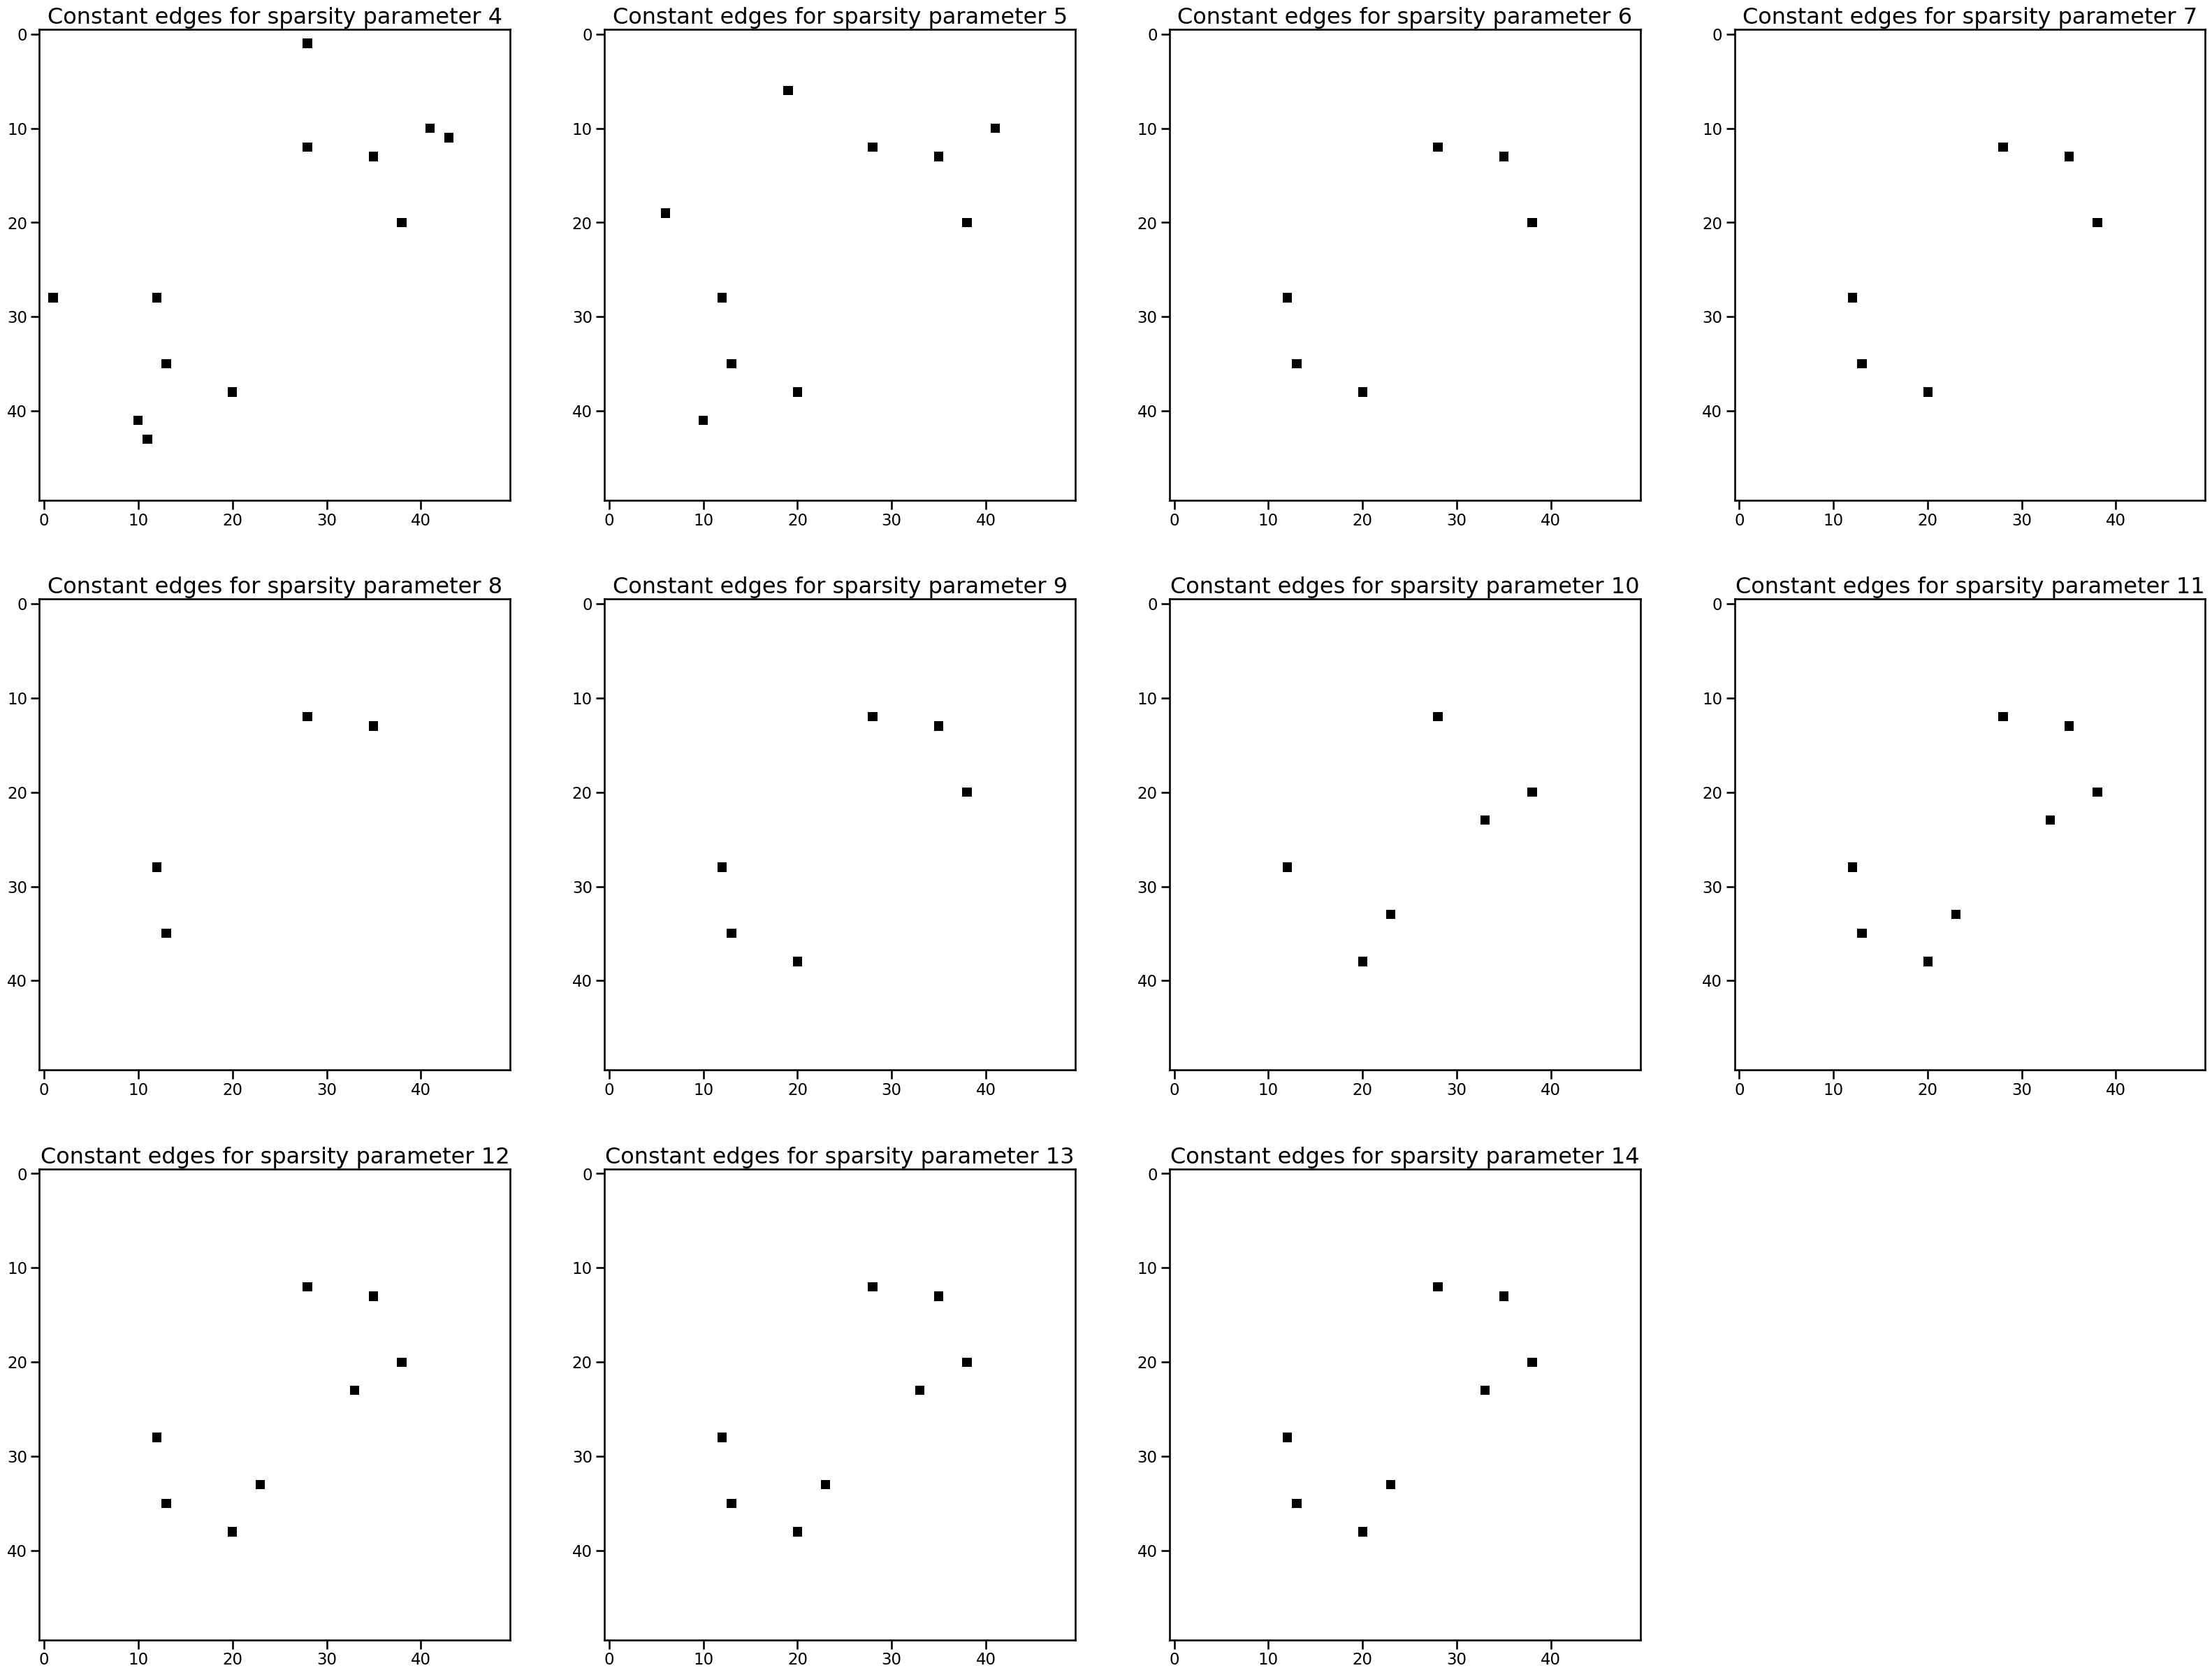

In [16]:
fig, axs = plt.subplots(3, 4, figsize=(40,30))

for i, ax in enumerate(axs.flatten()):
    if i == 11:
        ax.remove()
        break
    
    s_avg = np.mean(avg_adj_mats_per_s[i], axis=0)
    constant_edges = np.where(s_avg == 1, 1, 0)
    ax.imshow(constant_edges, cmap='binary', interpolation='nearest')
    ax.set_title(f'Constant edges for sparsity parameter {s_params[i]}', fontsize=23)

> Question: in exercise 3, the estimated correlation matrix is obtained from a single fges_result, what to do with multiple fges_result contributing to one graph? Just average all of the involved correlation matrices?

> Run FGES once on each subject with no subsamples with varying sparsity, average over 16 subjects, check for which sparsity maximizes number of edges at 90% frequency (allowing one subject to not have the adjacency) - keep track of number of edges in each graph (general density at that sparsity level)

> each run vs each subject, let either 2 runs or 1 person to fail (around 90%), maximize number of edges at 90%

> keep track of number of edges in each graph